<a href="https://colab.research.google.com/github/parthd06/ML_Algorithms/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [ ]:
loan_data = pd.read_csv('/content/Train_Loan_Home.csv')

In [ ]:
print(loan_data.columns.values)

['Loan_ID' 'Gender' 'Married' 'Dependents' 'Education' 'Self_Employed'
 'ApplicantIncome' 'CoapplicantIncome' 'LoanAmount' 'Loan_Amount_Term'
 'Credit_History' 'Property_Area' 'Loan_Status']


In [ ]:
print(loan_data['Gender'])

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object


In [ ]:
loan_data['Gender'] = LabelEncoder().fit_transform(loan_data['Gender'].astype(str))
print(loan_data['Gender'])

0      1
1      1
2      1
3      1
4      1
      ..
609    0
610    1
611    1
612    1
613    0
Name: Gender, Length: 614, dtype: int64


In [ ]:
loan_data['Married'] = LabelEncoder().fit_transform(loan_data['Married'].astype(str))
print(loan_data['Married'])

0      0
1      1
2      1
3      1
4      0
      ..
609    0
610    1
611    1
612    1
613    0
Name: Married, Length: 614, dtype: int64


In [ ]:
loan_data['Education'] = LabelEncoder().fit_transform(loan_data['Education'].astype(str))
print(loan_data['Education'])

0      0
1      0
2      0
3      1
4      0
      ..
609    0
610    0
611    0
612    0
613    0
Name: Education, Length: 614, dtype: int64


In [ ]:
loan_data['Self_Employed'] = LabelEncoder().fit_transform(loan_data['Self_Employed'].astype(str))
print(loan_data['Self_Employed'])

0      0
1      0
2      1
3      0
4      0
      ..
609    0
610    0
611    0
612    0
613    1
Name: Self_Employed, Length: 614, dtype: int64


In [ ]:
loan_data['Property_Area'] = LabelEncoder().fit_transform(loan_data['Property_Area'].astype(str))
print(loan_data['Property_Area'])

0      2
1      0
2      2
3      2
4      2
      ..
609    0
610    0
611    2
612    2
613    1
Name: Property_Area, Length: 614, dtype: int64


In [ ]:
loan_data = loan_data.drop('Loan_ID',axis=1)
loan_data = loan_data.fillna(loan_data.mean())

X = loan_data.drop('Loan_Status',axis=1)
Y = loan_data['Loan_Status']
Y = LabelEncoder().fit_transform(loan_data['Loan_Status'].astype(str))

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=1)
Naivebayes = GaussianNB()

b = Naivebayes.fit(X_train,y_train)
c = Naivebayes.predict(X_test)

print(c)

[1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0
 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
acc = sklearn.metrics.accuracy_score(y_test, c)
print(acc)

0.7837837837837838


### S&P 500 Dataset

In [ ]:
# machine learning classification
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# For data manipulation
import pandas as pd

# To plot
import matplotlib.pyplot as plt
import seaborn

In [ ]:
pip install yfinance

     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 6.4 MB 27.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


[*********************100%***********************]  1 of 1 completed


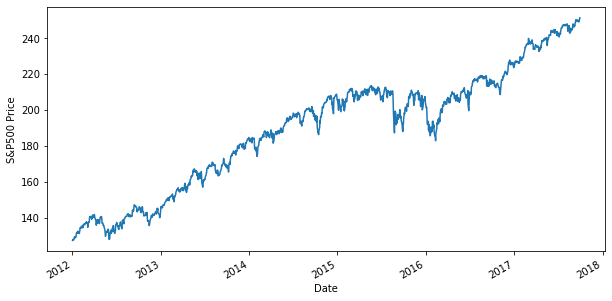

In [ ]:
import yfinance as yf
Df = yf.download('SPY', start="2012-01-01", end="2017-10-01")        
Df = Df.dropna()
Df.Close.plot(figsize=(10,5))
plt.ylabel("S&P500 Price")
plt.show()

In [ ]:
import numpy as np
y = np.where(Df['Close'].shift(-1) > Df['Close'],1,-1)

In [ ]:
Df['Open-Close'] = Df.Open - Df.Close
Df['High-Low'] = Df.High - Df.Low
X=Df[['Open-Close','High-Low']]

In [ ]:
split_percentage = 0.8
split = int(split_percentage*len(Df))

In [ ]:
# Train data set
X_train = X[:split]
y_train = y[:split]

In [ ]:
# Test data set
X_test = X[split:]
y_test = y[split:]

In [ ]:
cls = SVC().fit(X_train, y_train)

In [ ]:
accuracy_train = accuracy_score(y_train, cls.predict(X_train))
accuracy_test = accuracy_score(y_test, cls.predict(X_test))

In [ ]:
print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 55.45%
Test Accuracy: 53.10%


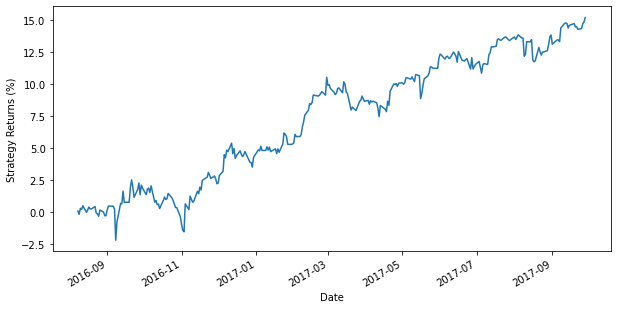

In [ ]:
Df['Predicted_Signal'] = cls.predict(X)
# Calculate log returns
Df['Return'] = np.log(Df.Close.shift(-1) / Df.Close)*100
Df['Strategy_Return'] = Df.Return * Df.Predicted_Signal
Df.Strategy_Return.iloc[split:].cumsum().plot(figsize=(10,5))
plt.ylabel("Strategy Returns (%)")
plt.show()